In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/data/data food/MonanVN'
valid_path = '/content/drive/MyDrive/data/data food/MonanVN'
test_path = '/content/drive/MyDrive/data/data food/MonanVN'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), 
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 212 images belonging to 10 classes.
Found 212 images belonging to 10 classes.
Found 212 images belonging to 10 classes.


In [ ]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 256)     

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=50, verbose=1)

Epoch 1/50
22/22 [==============================] - 8s 352ms/step - loss: 2.3670 - accuracy: 0.1226 - val_loss: 2.2795 - val_accuracy: 0.1509
Epoch 2/50
22/22 [==============================] - 7s 336ms/step - loss: 2.2864 - accuracy: 0.1509 - val_loss: 2.2408 - val_accuracy: 0.1509
Epoch 3/50
22/22 [==============================] - 7s 332ms/step - loss: 2.2649 - accuracy: 0.1274 - val_loss: 2.2652 - val_accuracy: 0.1415
Epoch 4/50
22/22 [==============================] - 7s 333ms/step - loss: 2.1335 - accuracy: 0.2311 - val_loss: 1.9036 - val_accuracy: 0.3491
Epoch 5/50
22/22 [==============================] - 7s 337ms/step - loss: 1.9641 - accuracy: 0.3396 - val_loss: 1.6206 - val_accuracy: 0.4340
Epoch 6/50
22/22 [==============================] - 7s 332ms/step - loss: 1.8975 - accuracy: 0.3491 - val_loss: 1.5556 - val_accuracy: 0.4481
Epoch 7/50
22/22 [==============================] - 7s 336ms/step - loss: 1.5755 - accuracy: 0.4387 - val_loss: 1.4716 - val_accuracy: 0.5189
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/data/data food/MonanVN/Train_MonAnVN.h5')

In [ ]:
classes = ['Bundau','banhbeo','banhchung','banhcuon','banhmi','bunbohue','caolau','chamuchalong','duongdua','nemnuong']
print("Image Processing.......Compleated")

Image Processing.......Compleated


Saving 000.jfif to 000.jfif
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Giá trị dự đoán:  bunbohue


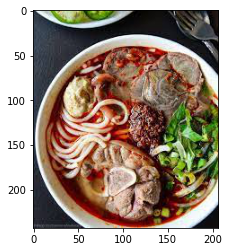

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('Giá trị dự đoán: ', classes[np.argmax(y_predict)])